In [277]:
#import data science packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

data1 = pd.read_excel("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/internal data/plate_reader_assay/plate_reader_segregants_10_31.xlsx")
data2 = pd.read_excel("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/internal data/plate_reader_assay/bence 11 05.xlsx")
data3 = pd.read_excel("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/internal data/plate_reader_assay/bence 11 05 2.xlsx")
data4 = pd.read_excel("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/internal data/plate_reader_assay/bence 11 05 3.xlsx")
data5 = pd.read_excel("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/internal data/plate_reader_assay/bence 11 05 4.xlsx")
data1.drop(range(1056,1077), inplace=True)
data5.drop(range(1056,1077), inplace=True)

In [278]:
#the 0th 10th, 20th etc. rows have identifiers such as A1, and A2 till F12. In between is the data. Extract these identifiers, and attach their respective data as a list
def get_cv_df(data,map):
    identifiers = []
    data_list = []
    for i in range(0, len(data), 11):
        identifiers.append(data.iloc[i, 0])
        data_list.append(data.iloc[i+1:i+11])

    CVs = []
    #find the 38th entry in data_list.
    control = data_list[37]
    #replace entries with Unused to np.nan
    control = control.replace("Unused", np.nan)
    control = control.to_numpy().flatten()
    control = control[~np.isnan(control)]
    #take mean of control
    control_mean = np.mean(control)

    for i in data_list:
        #change entries with Unused to 0
        i = i.replace("Unused", np.nan)
        i = i.to_numpy().flatten()
        #remogve nan values
        i = i[~np.isnan(i)]
        #subtract control_mean
        i = i - control_mean
        cv = np.std(i)/np.mean(i)
        CVs.append(cv)
    print(control_mean)
    CV_dataframe = pd.DataFrame({"Position":identifiers, "CV": CVs})
    #set value at D2 to 0
    CV_dataframe.loc[CV_dataframe['Position'] == "D2", 'CV'] = 0
    #set 37th value in CVs to 0
    CVs[37] = 0
    return CV_dataframe, CVs


In [279]:
#create a 8 by 12 heatmap of CVs such that top row is A1-A12, second row is B1-B12, etc.
#first create a list of lists, where each list is a row of the heatmap
def heatmap_from_CVs(CVs):
    heatmap_list = []
    #extend CVs to 96 values. If needed add zeros to the end
    if len(CVs) < 96:
        CVs.extend([0]*(96-len(CVs)))
    for i in range(0,96,12):
        heatmap_list.append(CVs[i:i+12])

    #now create a heatmap
    fig, ax = plt.subplots()
    im = ax.imshow(heatmap_list, cmap="hot")
    #add labels
    ax.set_xticks(np.arange(12))
    ax.set_yticks(np.arange(8))

    ax.set_yticklabels(["A", "B", "C", "D", "E", "F", "G", "H"])
    ax.set_xticklabels(["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"])
    #rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    #add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    return fig, ax



0.054477631578947354


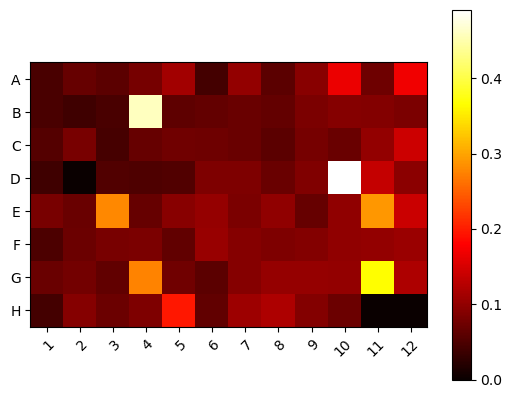

In [280]:
#make heatmap of data2
CV_dataframe, CVs = get_cv_df(data4, map)
fig, ax = heatmap_from_CVs(CVs)

In [281]:
#make CV_dataframe for all data and concatenate them, then make heatmap
CV_dataframe1, CVs1 = get_cv_df(data1, map)
CV_dataframe2, CVs2 = get_cv_df(data2, map)
CV_dataframe3, CVs3 = get_cv_df(data3, map)
CV_dataframe4, CVs4 = get_cv_df(data4, map)
CV_dataframe5, CVs5 = get_cv_df(data5, map)
CV_df = pd.concat([CV_dataframe2, CV_dataframe3, CV_dataframe4, CV_dataframe5])
CV__df = CV_df.reset_index(drop=True)
#groupby position and take mean of CVs
CV_df = CV__df.groupby("Position").mean()
CV_df = CV_df.reset_index()
#sort by cv
CV_df = CV_df.sort_values(by="CV")

0.046877631578947365
0.07237763157894737
0.05889078947368421
0.054477631578947354
0.09515526315789473


In [282]:
#import /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Phenotypes/filtering_results.csv separator \
filtering_results = pd.read_csv("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Phenotypes/filtering_results.csv", sep="\t")
#groupby Strain and take mean %flocc
filtering_results = filtering_results.groupby("Strain").mean()
#sort by %flocc
filtering_results.sort_values(by="%flocc")

,ODf,ODr,ODf+ODr,%flocc,Rep
Strain,,,,,
R33,6.906667,0.146667,7.053333,2.075254,2.00
R30,6.600000,0.143333,6.743333,2.109127,2.00
R13,6.600000,0.146667,6.746667,2.179931,2.00
R26,6.533333,0.153333,6.686667,2.294283,2.00
R41,6.133333,0.143333,6.276667,2.295753,2.00
R16,7.466667,0.183333,7.650000,2.378830,2.00
R25,6.800000,0.170000,6.970000,2.431318,2.00
R20,7.200000,0.186667,7.386667,2.529943,2.00
R46,5.933333,0.153333,6.086667,2.570907,2.00


In [283]:
#import /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Phenotypes/strains.csv
strains = pd.read_csv("/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Bence folder/Phenotypes/strains.csv",header=None)
#RENAME COLUMNS 1-12, INDICES A-H
strains = strains.rename(columns={0:"1", 1:"2", 2:"3", 3:"4", 4:"5", 5:"6", 6:"7", 7:"8", 8:"9", 9:"10", 10:"11", 11:"12"})
strains = strains.rename(index={0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G", 7:"H"})
strains

,1,2,3,4,5,6,7,8,9,10,11,12
A,JB50,JB22,JB869,JB760,JB1315,JB759,JB22,JB869,JB760,JB1315,JB759,JB50
B,JB759,JB759,R1,R7,R13,R19,R25,R31,R37,R43,R49,JB759
C,JB50,JB50,R2,R8,R14,R20,R26,R32,R38,R44,R50,JB50
D,JB759,ø,R3,R9,R15,R21,R27,R33,R39,R45,R51,JB759
E,JB50,JB759,R4,R10,R16,R22,R28,R34,R40,R46,R52,JB50
F,JB759,JB869,R5,R11,R17,R23,R29,R35,R41,R47,R53,JB759
G,JB50,JB22,R6,R12,R18,R24,R30,R36,R42,R48,R54,JB50
H,JB759,JB22,JB869,JB760,JB1315,JB759,JB22,JB869,JB760,JB1315,JB759,JB759


In [284]:
#loop through position in CV_df and get the strain from strains
strain_list = []
for i in CV_df["Position"]:
    #get row and column by splitting the position as the first character being the index and the rest being the column
    row = i[0]
    column = i[1:]
    #get the strain from strains
    strain = strains.loc[row, column]
    strain_list.append(strain)
#add the strain list to CV_df
CV_df["Strain"] = strain_list
#merge CV_df with filtering_results on Strain
CV_df_final_seg = CV_df.merge(filtering_results, on="Strain")
#remove any strain that starts with JB
CV_df_final_seg = CV_df_final_seg[~CV_df_final_seg["Strain"].str.startswith("JB")]



In [285]:
#remove entry at D2 in CV_df_final_seg
CV_df_final_seg = CV_df_final_seg[CV_df_final_seg["Position"] != "D2"]


In [286]:
CV_df_final_seg

,Position,CV,Strain,ODf,ODr,ODf+ODr,%flocc,Rep
14,C3,0.088720,R2,6.000000,1.333333,7.333333,17.966383,2.0
15,G6,0.088865,R24,3.866667,3.833333,7.700000,49.590500,2.0
16,G10,0.093412,R48,6.333333,0.510000,6.843333,7.274203,2.0
17,F3,0.095544,R5,5.533333,1.600000,7.133333,21.949222,2.0
27,D9,0.097133,R39,6.800000,1.800000,8.600000,20.928184,2.0
28,D3,0.100483,R3,6.466667,0.376667,6.843333,5.405447,2.0
29,D4,0.102793,R9,6.333333,0.206667,6.540000,3.157123,2.0
30,G3,0.103474,R6,7.000000,0.240000,7.240000,3.317769,2.0
31,F5,0.104159,R17,6.866667,1.600000,8.466667,18.433507,2.0
32,D5,0.105002,R15,6.466667,0.210000,6.676667,3.138503,2.0


Text(0.5, 1.0, 'Plate-reader assay vs. Filtering assay')

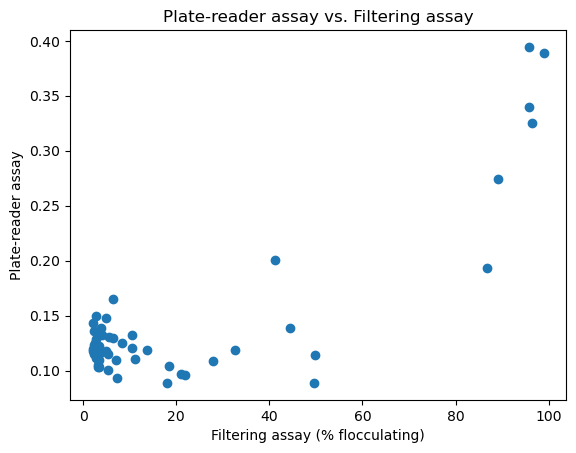

In [287]:
#plot CV vs %flocc
import scipy.stats as st
fig, ax = plt.subplots()
ax.scatter(CV_df_final_seg["%flocc"],CV_df_final_seg["CV"])
ax.set_xlabel("Filtering assay (% flocculating)")
ax.set_ylabel("Plate-reader assay")

#make it pretty and put pearson correlation on the plot
ax.set_title("Plate-reader assay vs. Filtering assay")




Text(0, 0.5, 'CV')

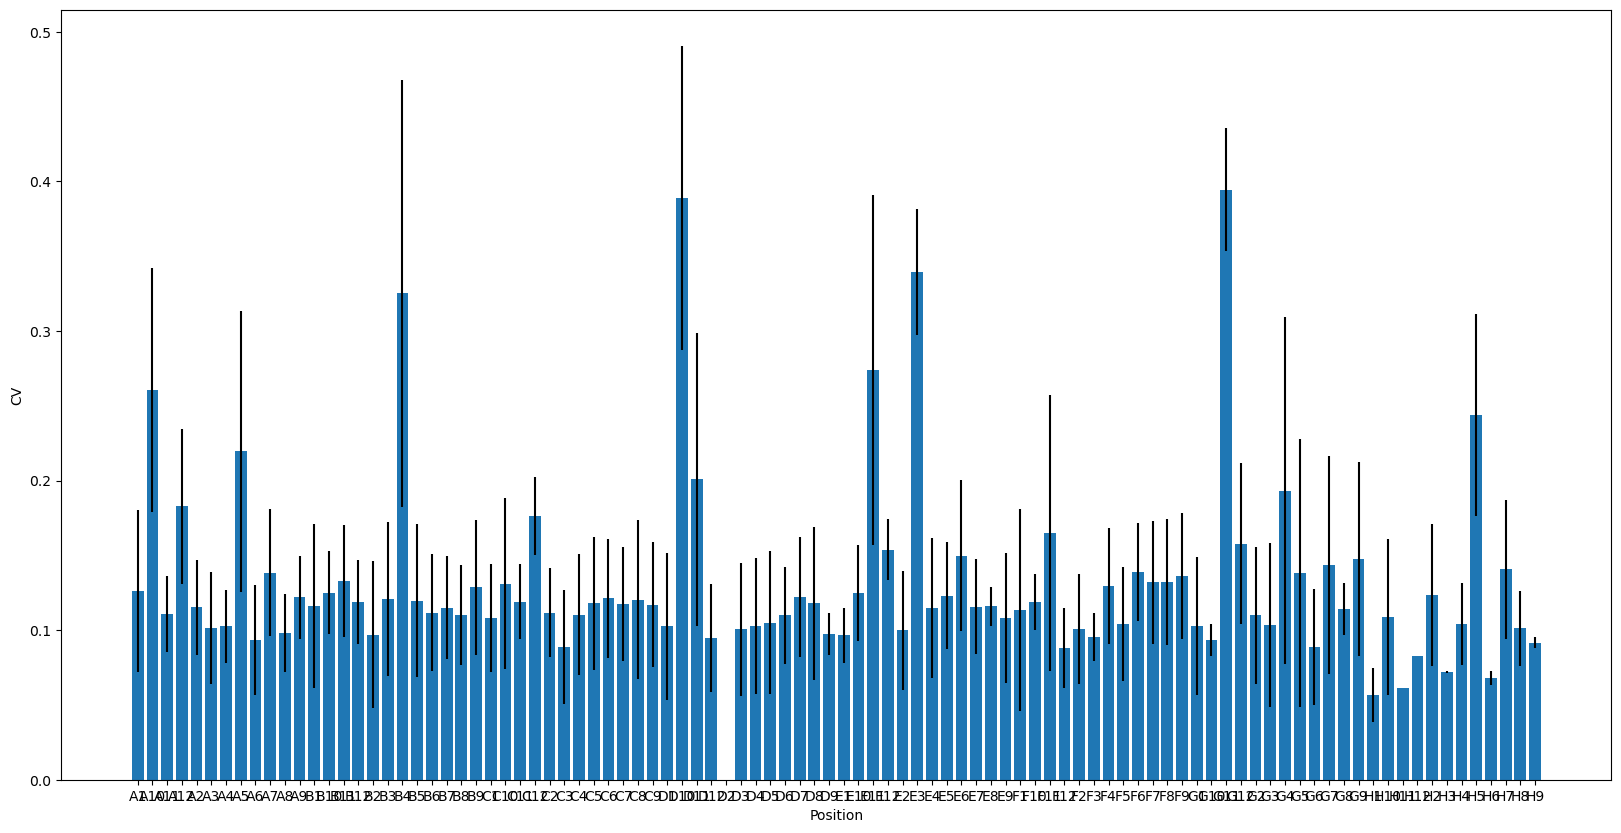

In [288]:
#make barchart from CV__df with error bars
#wide plot
fig, ax = plt.subplots(figsize=(20,10))
#create a new df with means and sd
CV_df_mean = CV__df.groupby("Position").mean()
CV_df_mean = CV_df_mean.reset_index()
CV_df_sd = CV__df.groupby("Position").std()
CV_df_sd = CV_df_sd.reset_index()
#merge the two dfs
CV_df_mean_sd = CV_df_mean.merge(CV_df_sd, on="Position")
#plot means with error bars
ax.bar(CV_df_mean_sd["Position"], CV_df_mean_sd["CV_x"], yerr=CV_df_mean_sd["CV_y"])
ax.set_xlabel("Position")
ax.set_ylabel("CV")


